In [1]:
import os

from sklearn import metrics 

import numpy as np
import tensorflow as tf
from tensorflow.python.summary import summary_iterator

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

## Set the BERT model directories for the finetuned results

In [2]:
bert_models = [
    'BERT/train_20/bs10_hdo15',
    'BERT/train_200/bs32_hdo15',
    'BERT/train_2000/bs32_hdo15',
    'BERT/train_5000/bs32_hdo15',
    'BERT/train_12000/bs32_hdo15',
]
bert_files = [os.path.join("./model", model, "test_predictions.pkl") for model in bert_models]

## Set the BERT model directories for the UDA results

In [3]:
uda_bert_models = [
    'BERT/train_20/uda_bs5_ur1_tf3_exp',
    'BERT/train_200/uda_bs10_ur1_tf3_exp',
    'BERT/train_2000/uda_bs32_hdo15_log_tf5_ur1_lr3',
    'BERT/train_5000/uda_bs32_hdo15_log_tf3_ur1_lr3',
    'BERT/train_12000/uda_bs32_hdo15_log_tf3_ur1_lr3',
]
uda_bert_files = [os.path.join("./model", model, "test_predictions.pkl") for model in uda_bert_models]

In [4]:
xlnet_models = [
    'XLNET/train_20/bs5_hdo10_lr1',
    'XLNET/train_200/bs32_hdo10_lr3',
    'XLNET/train_2000/bs32_hdo10_lr3',
    'XLNET/train_5000/bs32_hdo10_lr3',
    'XLNET/train_12000/bs32_hdo10_lr3',
]
xlnet_files = [os.path.join("./model", model, "test_predictions.pkl") for model in xlnet_models]

In [5]:
uda_xlnet_models = [
    'XLNET/train_20/uda_bs8_hdo10_exp_tf3_ur8_lr3',
    'XLNET/train_200/uda_bs16_hdo10_exp_tf3_ur2_lr3',
    'XLNET/train_2000/uda_bs32_hdo10_log_tf3_ur1_lr5',
    'XLNET/train_5000/uda_bs32_hdo10_log_tf3_ur2',
    'XLNET/train_12000/uda_bs32_hdo10_log_tf3_ur1_lr5',
]
uda_xlnet_files = [os.path.join("./model", model, "test_predictions.pkl") for model in uda_xlnet_models]

In [6]:
bert_dfs = [pd.read_pickle(file) for file in bert_files]
uda_bert_dfs = [pd.read_pickle(file) for file in uda_bert_files]
xlnet_dfs = [pd.read_pickle(file) for file in xlnet_files]
uda_xlnet_dfs = [pd.read_pickle(file) for file in uda_xlnet_files]

In [7]:
training_set_sizes = np.array([20,200,2000,5000,12000])

In [8]:
class_names = ["Book_{}".format(x) for x in range(1,6)]

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Summary for Case BERT/train_20/bs10_hdo15
Accuracy on Test Set: 0.230

Error Rate on Test Set: 0.770

F1 Scores on Test Set: [array([0.216, 0.152, 0.331, 0.155, 0.143])]

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.21      0.22      0.22       314
           2       0.27      0.11      0.15       397
           3       0.24      0.55      0.33       439
           4       0.16      0.15      0.16       316
           5       0.36      0.09      0.14       472

   micro avg       0.23      0.23      0.23      1938
   macro avg       0.25      0.22      0.20      1938
weighted avg       0.26      0.23      0.20      1938

Confusion matrix, without normalization
[[ 70  25 157  48  14]
 [ 69  42 215  56  15]
 [ 81  37 243  57  21]
 [ 53  20 171  48  24]
 [ 61  31 245  93  42]]


Summary for Case BERT/train_200/bs32_hdo15
Accuracy on Test Set: 0.277

Error Rate on Test Set: 0.723

F1 Scores on Test Set: [array([0.216, 0.152

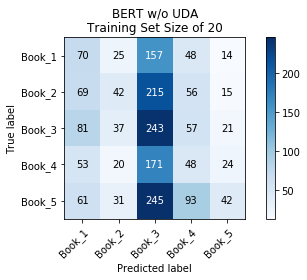

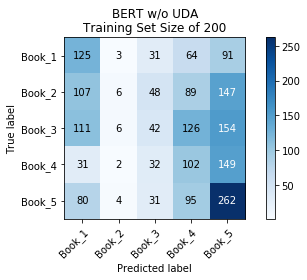

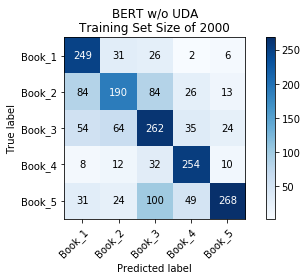

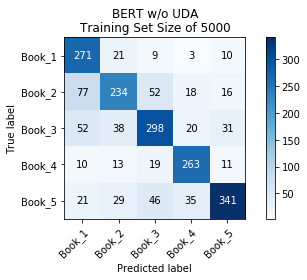

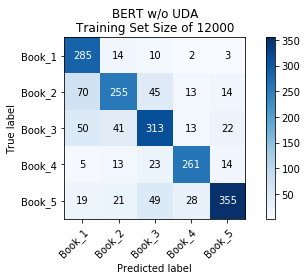

In [119]:
bert_errors = []
bert_f1_scores = []
bert_cm = []
for i, df in enumerate(bert_dfs):
    print("Summary for Case {}".format(bert_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    bert_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    bert_f1_scores.append(metrics.f1_score(df.label, df.preds, average=None))
    bert_cm.append(metrics.confusion_matrix(df.label, df.preds))
    print("F1 Scores on Test Set: {}\n".format(bert_f1_scores))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='BERT w/o UDA\nTraining Set Size of {}'.format(training_set_sizes[i]))
    print("="*50 + "\n\n")
    
    np.set_printoptions(precision=3)


Summary for Case BERT/train_20/uda_bs5_ur1_tf3_exp
Accuracy on Test Set: 0.224

Error Rate on Test Set: 0.776

F1 Scores on Test Set: [array([0.195, 0.256, 0.255, 0.018, 0.242])]

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.28      0.15      0.20       314
           2       0.20      0.36      0.26       397
           3       0.22      0.30      0.25       439
           4       0.12      0.01      0.02       316
           5       0.25      0.23      0.24       472

   micro avg       0.22      0.22      0.22      1938
   macro avg       0.22      0.21      0.19      1938
weighted avg       0.22      0.22      0.20      1938

Confusion matrix, without normalization
[[ 47 117  65   6  79]
 [ 43 142 114   3  95]
 [ 27 179 132   8  93]
 [ 19 132 102   3  60]
 [ 32 142 184   4 110]]


Summary for Case BERT/train_200/uda_bs10_ur1_tf3_exp
Accuracy on Test Set: 0.324

Error Rate on Test Set: 0.676

F1 Scores on Test Set: [

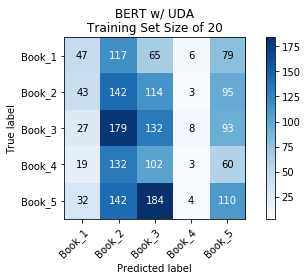

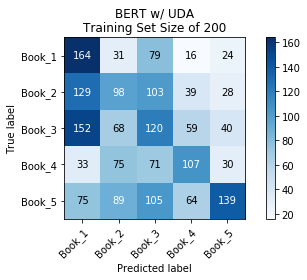

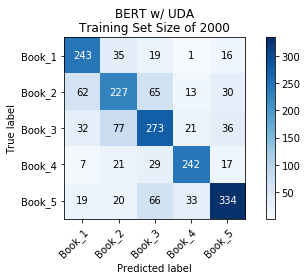

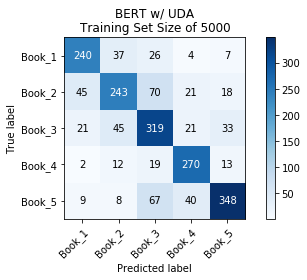

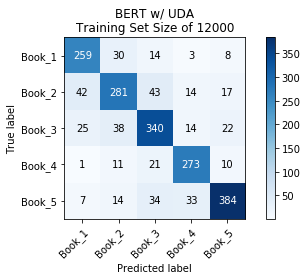

In [118]:
uda_bert_errors = []
uda_bert_f1_scores = []
uda_bert_cm = []
for i, df in enumerate(uda_bert_dfs):
    print("Summary for Case {}".format(uda_bert_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    uda_bert_f1_scores.append(metrics.f1_score(df.label, df.preds, average=None))
    uda_bert_cm.append(metrics.confusion_matrix(df.label, df.preds))
    print("F1 Scores on Test Set: {}\n".format(uda_bert_f1_scores))
    uda_bert_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='BERT w/ UDA\nTraining Set Size of {}'.format(training_set_sizes[i]))
    print("="*50 + "\n\n")

Summary for Case XLNET/train_20/bs5_hdo10_lr1
Accuracy on Test Set: 0.253

Error Rate on Test Set: 0.747

F1 Scores on Test Set: [array([0.336, 0.173, 0.224, 0.237, 0.258])]

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.25      0.50      0.34       314
           2       0.24      0.13      0.17       397
           3       0.31      0.18      0.22       439
           4       0.19      0.33      0.24       316
           5       0.34      0.21      0.26       472

   micro avg       0.25      0.25      0.25      1938
   macro avg       0.27      0.27      0.25      1938
weighted avg       0.27      0.25      0.24      1938

Confusion matrix, without normalization
[[158  13  37  79  27]
 [128  53  53 111  52]
 [130  48  77 107  77]
 [ 93  48  32 103  40]
 [117  55  49 152  99]]


Summary for Case XLNET/train_200/bs32_hdo10_lr3
Accuracy on Test Set: 0.333

Error Rate on Test Set: 0.667

F1 Scores on Test Set: [array([0.3

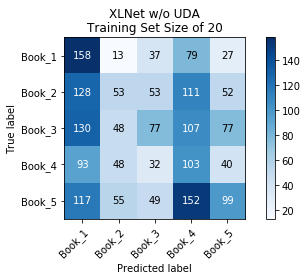

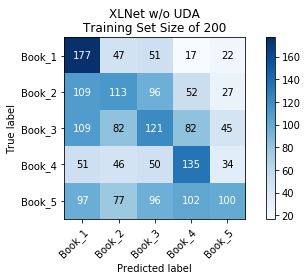

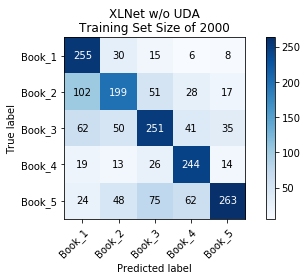

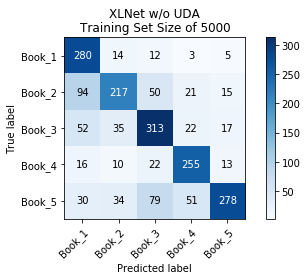

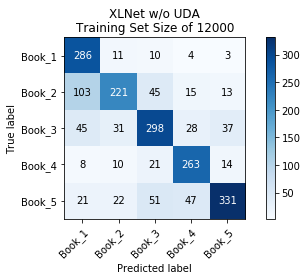

In [120]:
xlnet_errors = []
xlnet_f1_scores = []
xlnet_cm = []
for i, df in enumerate(xlnet_dfs):
    print("Summary for Case {}".format(xlnet_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    xlnet_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    xlnet_f1_scores.append(metrics.f1_score(df.label, df.preds, average=None))
    xlnet_cm.append(metrics.confusion_matrix(df.label,df.preds))
    print("F1 Scores on Test Set: {}\n".format(xlnet_f1_scores))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='XLNet w/o UDA\nTraining Set Size of {}'.format(training_set_sizes[i]))
    print("="*50 + "\n\n")
    
    np.set_printoptions(precision=3)

Summary for Case XLNET/train_20/uda_bs8_hdo10_exp_tf3_ur8_lr3
Accuracy on Test Set: 0.182

Error Rate on Test Set: 0.818

F1 Scores on Test Set: [array([0.285, 0.   , 0.114, 0.183, 0.013])]

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.17      0.83      0.29       314
           2       0.00      0.00      0.00       397
           3       0.34      0.07      0.11       439
           4       0.18      0.19      0.18       316
           5       0.75      0.01      0.01       472

   micro avg       0.18      0.18      0.18      1938
   macro avg       0.29      0.22      0.12      1938
weighted avg       0.32      0.18      0.11      1938

Confusion matrix, without normalization
[[260   0   8  46   0]
 [306   0  21  70   0]
 [349   0  30  59   1]
 [247   0   9  60   0]
 [347   0  19 103   3]]


Summary for Case XLNET/train_200/uda_bs16_hdo10_exp_tf3_ur2_lr3
Accuracy on Test Set: 0.324

Error Rate on Test Set: 0.676

F1

/Users/tom/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tom/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




Summary for Case XLNET/train_5000/uda_bs32_hdo10_log_tf3_ur2
Accuracy on Test Set: 0.711

Error Rate on Test Set: 0.289

F1 Scores on Test Set: [array([0.285, 0.   , 0.114, 0.183, 0.013]), array([0.391, 0.172, 0.314, 0.349, 0.367]), array([0.698, 0.581, 0.64 , 0.754, 0.721]), array([0.725, 0.656, 0.686, 0.772, 0.726])]

Classification Report on Dev Set: 
               precision    recall  f1-score   support

           1       0.64      0.83      0.73       314
           2       0.68      0.63      0.66       397
           3       0.66      0.72      0.69       439
           4       0.75      0.80      0.77       316
           5       0.85      0.64      0.73       472

   micro avg       0.71      0.71      0.71      1938
   macro avg       0.72      0.72      0.71      1938
weighted avg       0.72      0.71      0.71      1938

Confusion matrix, without normalization
[[261  24  22   3   4]
 [ 74 250  42  18  13]
 [ 40  40 314  19  26]
 [ 11  14  28 252  11]
 [ 20  37  70  45 3

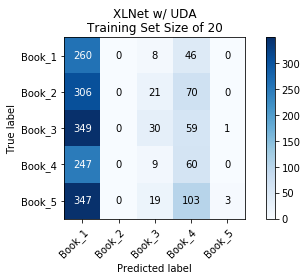

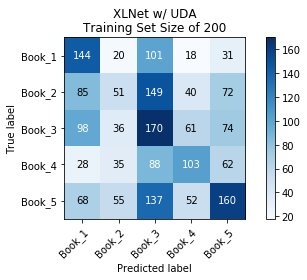

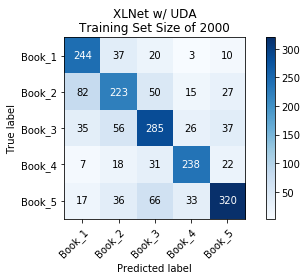

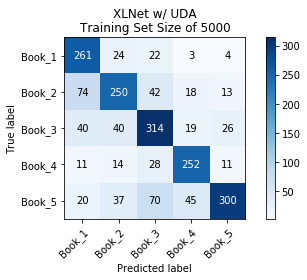

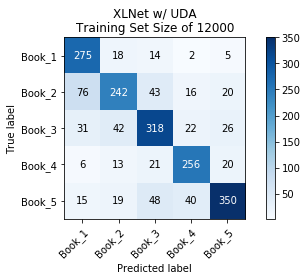

In [121]:
uda_xlnet_errors = []
uda_xlnet_f1_scores = []
uda_xlnet_cm = []
for i, df in enumerate(uda_xlnet_dfs):
    print("Summary for Case {}".format(uda_xlnet_models[i]))
    print("="*50)
    print("Accuracy on Test Set: {:3.3f}\n".format(metrics.accuracy_score(df.label, df.preds)))
    print("Error Rate on Test Set: {:3.3f}\n".format(1-metrics.accuracy_score(df.label, df.preds)))
    uda_xlnet_errors.append(1-metrics.accuracy_score(df.label, df.preds))
    uda_xlnet_f1_scores.append(metrics.f1_score(df.label, df.preds, average=None))
    uda_xlnet_cm.append(metrics.confusion_matrix(df.label,df.preds))
    print("F1 Scores on Test Set: {}\n".format(uda_xlnet_f1_scores))
    print("="*50)
    print("Classification Report on Dev Set: \n", metrics.classification_report(df.label, df.preds))
    plot_confusion_matrix(df.label, df.preds, classes=class_names,
                      title='XLNet w/ UDA\nTraining Set Size of {}'.format(training_set_sizes[i]))
    print("="*50 + "\n\n")
    
    np.set_printoptions(precision=3)

# Observations
There appears to be a significant overprediction on Book_1. I wonder if this has to do with the fact that the training data was balanced, but the development set does not appear to be. Let's take a look at the distribution of the actual labels in our training set.

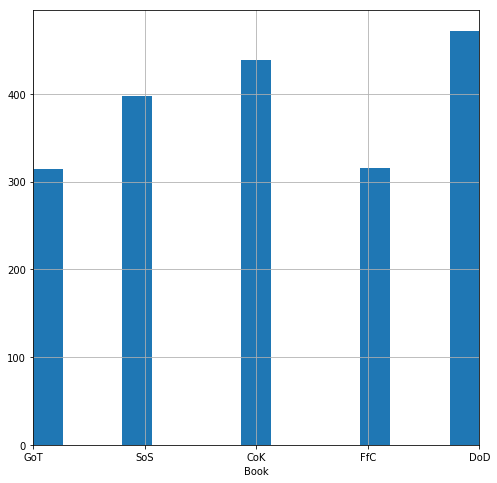

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
bert_dfs[0].label.hist(bins=15, grid=True, ax=ax)
ax.set_xlabel("Book")
ax.set_xlim(1,5)
plt.xticks(range(1,6), ('GoT', 'SoS', 'CoK', 'FfC', 'DoD'))
print()

In [14]:
error_df = pd.read_pickle('./errors.pkl')

In [15]:
error_df['bert_ft_errors'] = bert_errors
error_df['uda_bert_errors'] = uda_bert_errors
error_df['xlnet_ft_errors'] = xlnet_errors
error_df['uda_xlnet_errors'] = uda_xlnet_errors

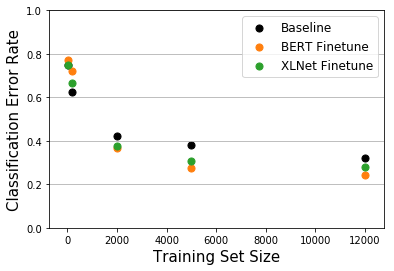

In [16]:
fig, ax = plt.subplots()
plt.scatter(error_df.datasets, error_df.bl_errors, c='black',s=50, label='Baseline')
plt.scatter(error_df.datasets, error_df.bert_ft_errors, c='tab:orange',s=50, label='BERT Finetune')
plt.scatter(error_df.datasets, error_df.xlnet_ft_errors, c='tab:green',s=50, label='XLNet Finetune')
ax.set(ylim=(0,1.0))
plt.legend(fontsize=12)
plt.xlabel('Training Set Size', fontsize=15)
plt.ylabel('Classification Error Rate', fontsize=15)
plt.grid(True,axis='y')
plt.savefig('report/working/baseline.png')

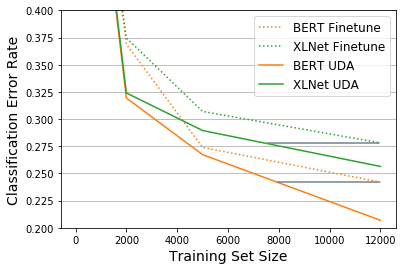

In [44]:
fig, ax = plt.subplots()
plt.plot(error_df.datasets, error_df.bert_ft_errors, c='tab:orange',ls =':', label='BERT Finetune')
plt.plot(error_df.datasets, error_df.xlnet_ft_errors, c='tab:green',ls =':', label='XLNet Finetune')
plt.plot(error_df.datasets, error_df.uda_bert_errors, c='tab:orange',ls ='-', label='BERT UDA')
plt.plot(error_df.datasets, error_df.uda_xlnet_errors, c='tab:green',ls ='-', label='XLNet UDA')
ax.axhline(error_df.bert_ft_errors.min(), xmin=0.65, xmax=0.95, c='slategray')
ax.axhline(error_df.xlnet_ft_errors.min(), xmin=0.62, xmax=0.95, c='slategray')
ax.set(ylim=(0.2,0.4))
plt.legend(fontsize=12)
plt.xlabel('Training Set Size', fontsize=14)
plt.ylabel('Classification Error Rate', fontsize=14)
plt.grid(True,axis='y')
plt.savefig('report/working/uda_errors.png')

## Plot F1 Scores for the training set size of 2000 to show the effects of UDA

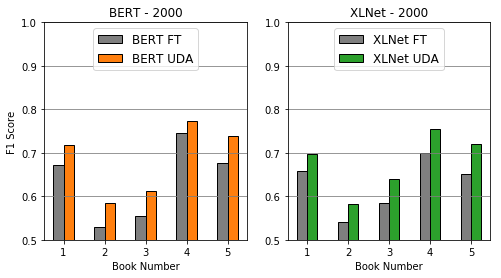

In [117]:
fig, axes = plt.subplots(1,2, figsize=(8,4))
axes = axes.flatten()
# set width of bar
bar_width = 0.25
x1 = np.arange(len(class_names)) - bar_width/2 + 1
x2 = x1 + bar_width
  
axes[0].bar(x1, bert_f1_scores[2], color='tab:gray', width=bar_width, edgecolor='black', label='BERT FT')     
axes[0].bar(x2, uda_bert_f1_scores[2], color='tab:orange', width=bar_width, edgecolor='black', label='BERT UDA')  
axes[0].set_xlabel('Book Number')
axes[0].set_ylabel('F1 Score')
axes[0].set_ylim(0.5,1.0)
axes[0].grid(True,axis='y',c='tab:gray')
axes[0].set_title('BERT - 2000')
axes[0].legend(fontsize=12, loc='upper center')

axes[1].bar(x1, xlnet_f1_scores[2], color='tab:gray', width=bar_width, edgecolor='black', label='XLNet FT')     
axes[1].bar(x2, uda_xlnet_f1_scores[2], color='tab:green', width=bar_width, edgecolor='black', label='XLNet UDA')  
axes[1].set_xlabel('Book Number')
axes[1].set_ylim(0.5,1.0)
axes[1].grid(True,axis='y',c='tab:gray')
axes[1].set_title('XLNet - 2000')
axes[1].legend(fontsize=12, loc='upper center')


plt.savefig('report/working/f1scores.png')

## Plot change in confusion matrix as a heatmap

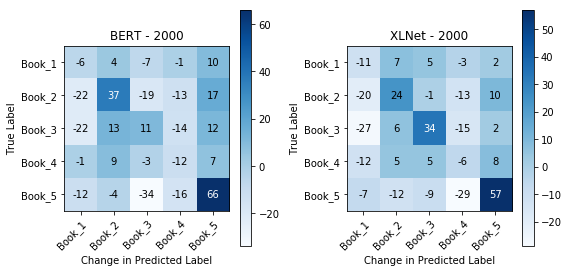

In [135]:
bert_delta_cm_2000 = uda_bert_cm[2] - bert_cm[2]
xlnet_delta_cm_2000 = uda_xlnet_cm[2] - xlnet_cm[2]

titles = ['BERT - 2000',
         'XLNet - 2000']

# Define colormap
cmap=plt.cm.Blues

fig, axes = plt.subplots(1,2,figsize=(8,4))

axes = axes.flatten()
ims = []
for d, data in enumerate([bert_delta_cm_2000, xlnet_delta_cm_2000]):
    # Plot Bert on the left and XLNet on the right
    ims.append(axes[d].imshow(data, interpolation='nearest', cmap=cmap))
    axes[d].figure.colorbar(ims[d], ax=axes[d])
    
    # Show all of the tickmarks
    axes[d].set(xticks=np.arange(data.shape[1]),
           yticks=np.arange(data.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=class_names, yticklabels=class_names,
           title=titles[d],
           ylabel='True Label',
           xlabel='Change in Predicted Label')

    # Rotate the tick labels and set their alignment.
    plt.setp(axes[d].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = data.max() / 2.
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            axes[d].text(j, i, format(data[i, j], fmt),
                    ha="center", va="center",
                    color="white" if data[i, j] > thresh else "black")
fig.tight_layout()
plt.savefig('report/working/delta_cm.png')


## Model checkpoints stored on Google Drive for experiments below

In [65]:
tfidf_bert_5000 = np.array([0.7,0.5,0.4,0.3 ])
tfidf_acc_bert_5000 = np.array([0.724,0.743,0.735,0.745 ])
tfidf_er_bert_5000 = 1-tfidf_acc_bert_5000
tfidf_xlnet_2000 = np.array([0.5,0.4,0.3,0.2,0.1 ])
tfidf_acc_xlnet_2000 = np.array([0.639,0.653,0.657,0.656,0.661 ])
tfidf_er_xlnet_2000 = 1-tfidf_acc_xlnet_2000

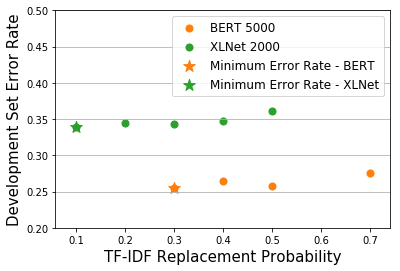

In [66]:
fig, ax = plt.subplots()
plt.scatter(tfidf_bert_5000, tfidf_er_bert_5000, c='tab:orange',s=50, label='BERT 5000')
plt.scatter(tfidf_xlnet_2000, tfidf_er_xlnet_2000, c='tab:green',s=50, label='XLNet 2000')
plt.scatter(tfidf_bert_5000[np.argmin(tfidf_er_bert_5000)], min(tfidf_er_bert_5000), marker='*', c='tab:orange',s=150, label='Minimum Error Rate - BERT')
plt.scatter(tfidf_xlnet_2000[np.argmin(tfidf_xlnet_2000)], min(tfidf_er_xlnet_2000), marker='*', c='tab:green',s=150, label='Minimum Error Rate - XLNet')
ax.set(ylim=(0.2,0.5))
plt.legend(fontsize=12)
plt.xlabel('TF-IDF Replacement Probability', fontsize=15)
plt.ylabel('Development Set Error Rate', fontsize=15)
plt.grid(True,axis='y')
plt.savefig('report/working/tfidf.png')